# 语音业务

In [2]:
import numpy as np
import pandas as pd

### Clean Up

In [3]:
data_raw = pd.read_excel("附件1语音业务用户满意度数据.xlsx").set_index("用户id")

In [4]:
data = data_raw.copy()
data

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
用户id,,,,,,,,,,,,,,,,,,,,,
1,10,6,6,6,1,-1,2,-1,-1,-1,...,0.0,480,1.0,8450801,8450801,是,否,银卡,0.0,0.00
2,2,1,1,1,1,1,2,-1,4,-1,...,0.0,480,1.0,17425910,17425910,是,是,银卡,0.0,0.00
3,10,7,7,7,1,-1,-1,-1,-1,-1,...,0.0,413,1.0,6215849,6215849,否,否,三星,0.0,3.76
4,6,7,7,6,1,1,2,-1,-1,-1,...,0.0,301,1.0,5370710,5370710,是,否,三星,0.0,0.00
5,5,5,4,3,1,-1,2,-1,-1,5,...,0.0,1193,1.0,3857521,3857521,否,否,银卡,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,10,10,10,8,1,-1,2,-1,-1,-1,...,0.0,320,0.0,16654303,0,否,否,二星,0.0,0.00
5430,10,10,10,10,1,1,2,-1,-1,-1,...,0.0,147,0.0,627901,0,是,否,三星,0.0,0.00
5431,6,5,7,4,1,-1,-1,-1,4,-1,...,0.0,150,0.0,6816663,0,否,否,银卡,0.0,0.00


In [5]:
# Binary Conversion

bool_1 = ["居民小区","办公室","高校","商业街","地铁"]
bool_2 = ["手机没有信号","有信号无法拨通","通话过程中突然中断","通话中有杂音、听不清、断断续续","串线","通话过程中一方听不见"]
bool_3 = ["脱网次数","mos质差次数","未接通掉话次数"]

def binary(df, tar):
    df[tar] = df[tar].apply(pd.to_numeric, errors='coerce')<=0
    return df

data = binary(data, bool_1)
data = binary(data, bool_2)
data = binary(data, bool_3)

In [6]:
# Class Conversion

class_1 = [r"4\5G用户", "是否5G网络客户", "语音方式", "终端品牌"]
class_2 = ["是否实名登记用户","客户星级标识"]

def classif(df, tar):
    for cls in tar:
        df[cls],_ = pd.factorize(df[cls])
        
    return df

data = classif(data, class_1)
data = classif(data, class_2)

In [7]:
data.head()

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,是否实名登记用户,客户星级标识,当月欠费金额,前第3个月欠费金额
用户id,,,,,,,,,,,,,,,,,,,,,
1,10,6,6,6,1,True,False,True,True,True,...,0.0,480,1.0,8450801,8450801,0,0,0,0.0,0.00
2,2,1,1,1,1,False,False,True,False,True,...,0.0,480,1.0,17425910,17425910,0,1,0,0.0,0.00
3,10,7,7,7,1,True,True,True,True,True,...,0.0,413,1.0,6215849,6215849,1,0,1,0.0,3.76
4,6,7,7,6,1,False,False,True,True,True,...,0.0,301,1.0,5370710,5370710,0,0,1,0.0,0.00
5,5,5,4,3,1,True,False,True,True,False,...,0.0,1193,1.0,3857521,3857521,1,0,0,0.0,0.00


In [8]:
int_score = ["语音通话整体满意度","网络覆盖与信号强度","语音通话清晰度","语音通话稳定性"]

data[int_score] = data[int_score].apply(pd.to_numeric, errors='coerce')

In [9]:
score = data[int_score]
score = score.values.T
score

array([[10,  2, 10, ...,  6,  9, 10],
       [ 6,  1,  7, ...,  5,  9, 10],
       [ 6,  1,  7, ...,  7, 10, 10],
       [ 6,  1,  7, ...,  4,  9, 10]], dtype=int64)

## 打分线性回归

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(score[1:].T, score[0])

LinearRegression()

### 拟合结果

In [12]:
import matplotlib.pyplot as plt

[0.29897125 0.44369613 0.19968409]
0.6732004276680339


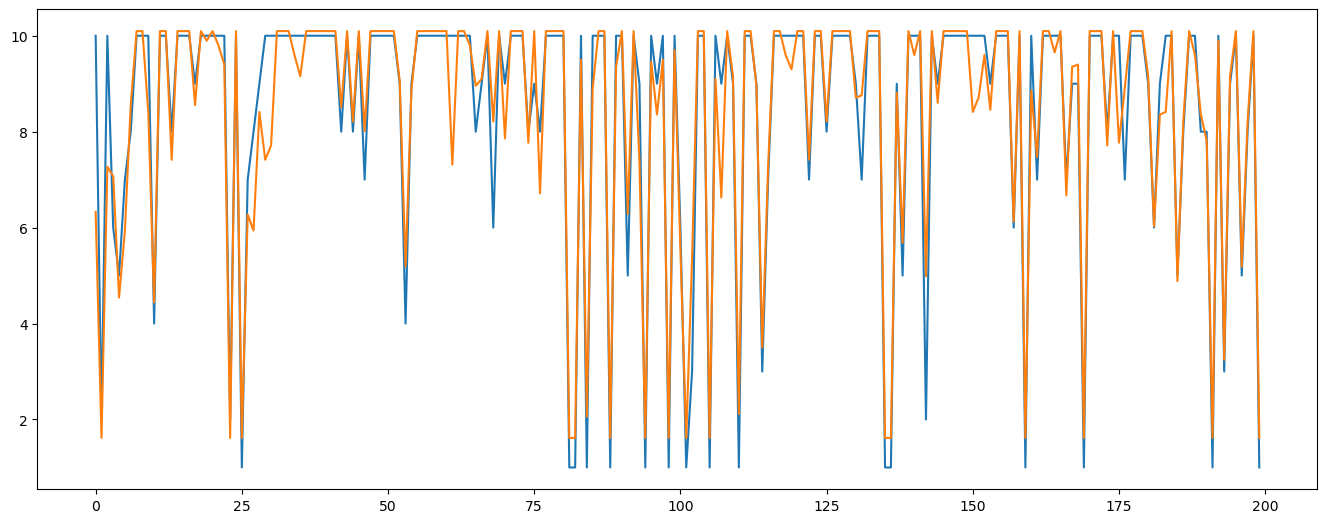

In [13]:
plt.plot(score[0, :200])

score_pred = model.predict(score[1:].T)
plt.plot(score_pred[:200])

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

print(model.coef_)
print(model.intercept_)

## 神经网络打分逐项分析

In [132]:
data_size = len(data)
train_size = int(data_size*0.8)
test_size = data_size - train_size

data_train = data[:train_size]
data_test = data[train_size:]

score_train = score[:,:train_size]
score_test = score[:,train_size:]

In [133]:
score_test.shape

(4, 1087)

In [247]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.h1 = nn.Linear(hidden_dim, hidden_dim)
        self.h2 = nn.Linear(hidden_dim, hidden_dim)
        self.h3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.h1(out)
        out = self.relu(out)
        #out = self.h2(out)
        #out = self.relu(out)
        #out = self.h3(ou"t)
        #out = self.relu(out)
        out = self.fc2(out)
        
        return out
    
def train(model, x_train, y_train, num_epochs, window):
    
    import time
    
    criterion = torch.nn.MSELoss()
    optimiser = torch.optim.Adam(model.parameters(), lr=0.00001)
    
    hist = np.zeros(num_epochs)
    start_time = time.time()
    
    for t in range(num_epochs):
        y_train_pred = model(x_train[t*window:t*window+window])
        loss = criterion(y_train_pred, y_train[t*window:t*window+window])
        
        if(t%50==0):
            print("Epoch ", t, "MSE: ", loss.item())
            #print(signal_score[t*window:t*window+1])
            #print(y_train_pred[0])
        hist[t] = loss.item()
    
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    plt.plot(hist)
    
    return hist

### 信号强度

In [248]:
signal_score = torch.from_numpy(pd.get_dummies(score_train[1]).values).type(torch.Tensor)
signal_score[:6]

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [249]:
signal_train = torch.from_numpy(data_train[bool_1+bool_2+bool_3+class_1].values.astype(float)).type(torch.Tensor)
signal_train.shape

torch.Size([4346, 18])

Epoch  0 MSE:  0.13915321230888367
Epoch  50 MSE:  0.10011906921863556
Epoch  100 MSE:  0.1305921971797943
Epoch  150 MSE:  0.10839712619781494
Epoch  200 MSE:  0.09700267016887665
Epoch  250 MSE:  0.10802698135375977
Epoch  300 MSE:  0.10728003084659576
Epoch  350 MSE:  0.12883535027503967
Epoch  400 MSE:  0.1037161722779274
Epoch  450 MSE:  0.08663992583751678
Epoch  500 MSE:  0.10684043169021606
Epoch  550 MSE:  0.1316297948360443
Epoch  600 MSE:  0.10834916681051254
Epoch  650 MSE:  0.10374613851308823
Epoch  700 MSE:  0.09937141090631485
Epoch  750 MSE:  0.09519406408071518
Epoch  800 MSE:  0.08547230809926987
Epoch  850 MSE:  0.09139459580183029
Epoch  900 MSE:  0.12553521990776062
Epoch  950 MSE:  0.08333338797092438
Epoch  1000 MSE:  0.097171351313591
Epoch  1050 MSE:  0.08905331045389175
Training time: 0.905040979385376


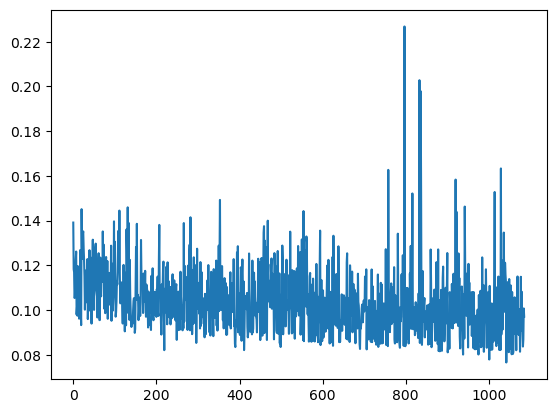

In [250]:
signal_model = MLP(signal_train.shape[1], 32, 10)

batch_size = 256
window = batch_size//64
num_epochs = train_size//window

hist = train(signal_model, signal_train, signal_score, num_epochs, window)

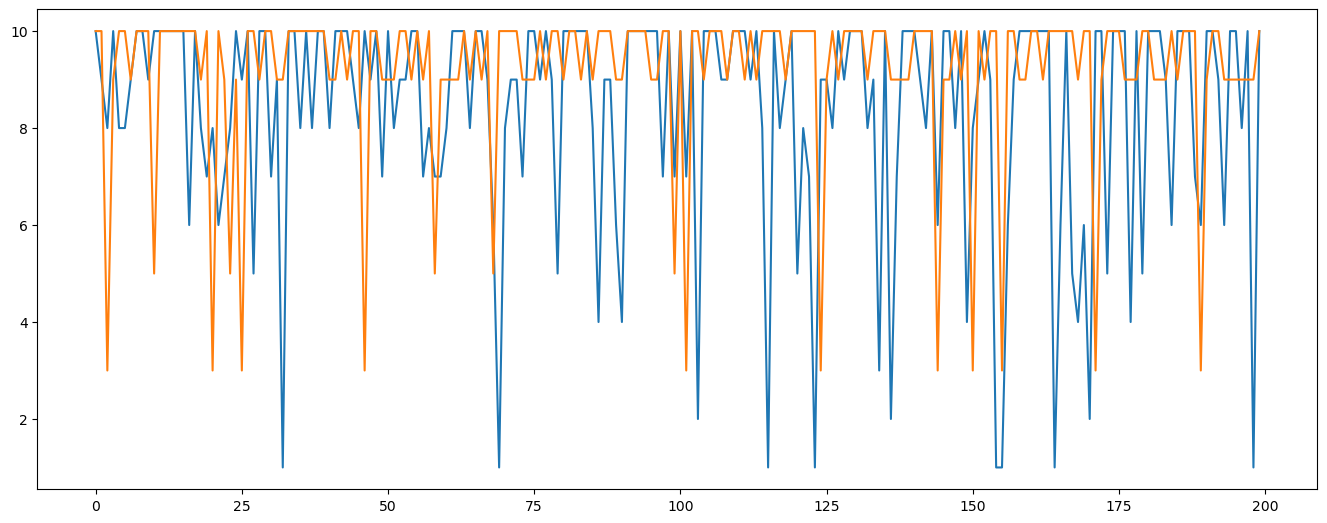

In [251]:
signal_test = torch.from_numpy(data_test[bool_1+bool_2+bool_3+class_1].values.astype(int)).type(torch.Tensor)

signal_pred = signal_model(signal_test)
signal_pred = signal_pred.argmax(dim=1)+1

plt.plot(score_test[1, :200])
plt.plot(signal_pred[:200])

plt.subplots_adjust(left=0, right=2, bottom = 0, top= 1)

In [252]:
score_test

array([[10,  9,  8, ...,  6,  9, 10],
       [10,  9,  8, ...,  5,  9, 10],
       [10,  9,  8, ...,  7, 10, 10],
       [ 9,  9,  8, ...,  4,  9, 10]], dtype=int64)